# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Ковачев Виктор
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [58]:
#чтение матрицы смежности/инцидентности из файла
#первая строка в файле и первый столбец-название точек
#числа 1-9 взвешенные расстояния между точками
# E-остуствие пути между точками от слова empty 
def normalization(f):
    matrix=[[]]
    st=0
    for s in f:
        for i in range(len(s)):
            if s[i]=="\n":
                matrix.append([])
                st+=1
            else:  
                matrix[st].append(s[i])
    listP= matrix.pop(0)[1:]
    path2=[]
    for i in range(len(listP)):
        for j in range(1,len(listP)+1):
            if matrix[i][j]!='E':
                path2.append((listP[i],listP[j-1],matrix[i][j]))
    return path2,listP
f = open('C:/Users/Виктор/Desktop/вуз/СиАОД/MatrixGraph.txt','r')
path2,listP=normalization(f)
f.close()
print(path2)


[('A', 'B', '3'), ('A', 'C', '4'), ('A', 'D', '7'), ('B', 'C', '5'), ('B', 'G', '4'), ('C', 'E', '4'), ('C', 'G', '8'), ('D', 'C', '4'), ('E', 'A', '3'), ('E', 'F', '8'), ('F', 'D', '4'), ('G', 'F', '7'), ('G', 'H', '3'), ('H', 'A', '9'), ('H', 'F', '4')]


In [59]:
#Алгоритм Левита
def FindPath(enter,exit,path2,n,mas):
    M0,M1,M1_,M2=[],[],[],[]
    masD=['E']*n
    masName=['0']*n
    for i in range(n):
        if mas[i]!=enter:
            M2.append(mas[i])
        else:
            M1.append(mas[i])
            masD[i]=0
    while len(M1)>0:
        for i in range(len(path2)):
            if path2[i][0]==M1[0]:   
                point=path2[i][1]
                if point in M2:
                    if path2[i][0]==enter:
                        masD[mas.index(path2[i][1])]=int(path2[i][2])
                        masName[mas.index(path2[i][1])]=path2[i][0]
                    else:
                        masD[mas.index(path2[i][1])]=int(masD[mas.index(M1[0])])+int(path2[i][2])
                        masName[mas.index(path2[i][1])]=path2[i][0]
                    M1.append(M2.pop(M2.index(path2[i][1])))
                elif point in M1:
                    if len(M1_)==0:
                        if int(masD[mas.index(point)])>int(masD[mas.index(M1[0])])+int(path2[i][2]):
                            masD[mas.index(point)]=int(masD[mas.index(M1[0])])+int(path2[i][2])
                            masName[mas.index(path2[i][1])]=path2[i][0]
                    else:
                        if int(masD[mas.index(point)])>int(masD[mas.index(M1[0])])+int(path2[i][2]):
                            masD[mas.index(point)]=int(masD[mas.index(M1[0])])+int(path2[i][2])
                            masName[mas.index(path2[i][1])]=path2[i][0]
                            M0.append(M1_.pop(0))
                elif point in M0:
                    if int(masD[mas.index(point)])>int(masD[mas.index(M1[0])])+int(path2[i][2]):
                        masD[mas.index(point)]= int(masD[mas.index(M1[0])])+int(path2[i][2])
                        masName[mas.index(path2[i][1])]=path2[i][0]
                        M1_.append(M0.pop(M0.index(point))) 
        M0.append(M1.pop(0))            
    take=exit
    rMas=[]
    while take!=enter:
        nextP=masName[listP.index(take)]
        for i in range(len(path2)):
            if path2[i][0]==nextP and path2[i][1]==take:
                length=(path2[i][2])
        rMas.insert(0,(nextP,take,length))
        take=nextP   
    return rMas  
enter='G'
exit='E'
rezMatrix=FindPath(enter,exit,path2,len(listP),listP)
print(*rezMatrix)

('G', 'F', '7') ('F', 'D', '4') ('D', 'C', '4') ('C', 'E', '4')


посторение пути из точки G в тчоку E:
G->F->D->C->E


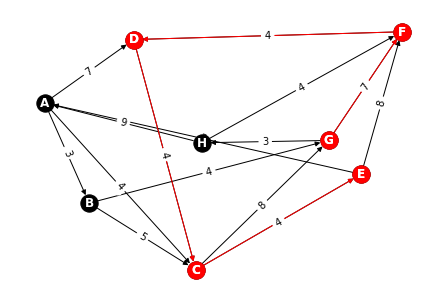

In [109]:
#Визуализация графа
import networkx as nx
import matplotlib.pyplot as plt
print(f'посторение пути из точки {enter} в тчоку {exit}:')
print(enter,'->',*[f'{rezMatrix[i][1]}->' for i in range(len(rezMatrix)-1)],exit,sep='')
G = nx.DiGraph() 
M = nx.DiGraph()
E = path2
Er=rezMatrix
G.add_weighted_edges_from(E)
M.add_weighted_edges_from(Er)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')

edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [65]:
#Это кода позваляет генерировать матрицы для графа нужного размера и с нужным кол-вом рёбер
import time
import random
def checkPos(posX,posY,i,j):
    for i_ in range(len(posX)):
                if posX[i_]==i:
                    if posY[i_]==j:
                        return True
    return False

def createMatrix(n,m,count):
    abc='ABCDEFGHJKLMNOP'
    mas='/'
    posX=[]
    posY=[]
    while len(posX)<count-1:
        valueX=random.randint(0,n-1)
        valueY=random.randint(0,m-1)
        if not checkPos(posX,posY,valueX,valueY):
            if valueX!=valueY and (valueX!=0 and valueY!=1):
                posX.append(valueX)
                posY.append(valueY)
    for i in range(n):
        mas+=abc[i]
    for i in range(m):
        mas+='\n'+abc[i]
        for j in range(n):
            if i==0 and j==1:
                mas+='5'  
            elif i==j:
                mas+='E'
            elif checkPos(posX,posY,i,j):
                mas+='3'
            else:
                mas+='E'
    return mas
        
        
print(createMatrix(5,5,8))

/ABCDE
AE5EEE
BEE33E
C3EEE3
D3EEE3
EEE3EE


In [61]:
#Вывод и анализ данных
from IPython.display import HTML, display
import time
import random
print('Время выполнения алгоритма в зависимости от числа узлов и ребер графа ')
data =[
    ['','Узлов: 3','Узлов: 4','Узлов: 5','Узлов: 6',
    'Узлов: 7','Узлов: 8'],
    ['Рёбер: 3',0,"/","/","/","/","/",],
    ['Рёбер: 4',"/",0,"/","/","/","/",],
    ['Рёбер: 5',"/",0,0,"/","/","/",],
    ['Рёбер: 6',"/",0,0,0,"/","/",],
    ['Рёбер: 7',"/","/",0,0,0,"/",],
    ['Рёбер: 8',"/","/",0,0,0,0,],
    ['Рёбер: 9',"/","/",0,0,0,0,],
    ['Рёбер: 10',"/","/",0,0,0,0,],
]

for i in range(1,7):
    for j in range(1,9):    
        if data[j][i]!='/':
            path,listP=normalization(createMatrix(j+3,j+3,i+3))
            start_time = time.time()
            rezMatrix=FindPath('A','B',path,len(listP),listP)
            data[j][i]=str(round(time.time() - start_time,8))

    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))



Время выполнения алгоритма в зависимости от числа узлов и ребер графа 


,Узлов: 3,Узлов: 4,Узлов: 5,Узлов: 6,Узлов: 7,Узлов: 8
Рёбер: 3,0.0,/,/,/,/,/
Рёбер: 4,/,0.0,/,/,/,/
Рёбер: 5,/,0.0,0.0,/,/,/
Рёбер: 6,/,0.0,0.0,0.0,/,/
Рёбер: 7,/,/,0.0,0.0,0.0,/
Рёбер: 8,/,/,0.0,0.0,0.0,0.0
Рёбер: 9,/,/,0.0,0.0,0.0,0.0
Рёбер: 10,/,/,0.0,0.0,0.0,0.0


### Из-за достаточно высокой скорости работы алгоритма Левита при разумных размерах графа не получается увидеть весомые отличая в скорости работы алгоритма при различных входных данных